# Differentiation

## Objectives
* Learn a bit about numerical differentiation
* Learn how to do a search for a root

Section 5.1 of our book

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Numerical differentiation

$$
\frac{dy(t)}{dt}
=
\lim_{h \rightarrow 0}
\frac{y(t + h) - y(t)}{h}
\tag{1}
$$

## Forward difference

This is the most direct application of (1). We simply evaluate at $t$ and $t+h$.

$$
\frac{dy(t)}{dt} \Biggr\rvert_\mathrm{fd} = \frac{f(t + h) - f(t)}{h} \tag{2}
$$

In [2]:
def f_diff(f, x, h):
    """
    Forward difference method.
    f is a function,
    x is the point(s),
    h is the distance to use for the difference.
    """
    return (f(x + h) - f(x)) / h

Let's compare a known derivative and a numerical one:

In [3]:
np.cos(1)

0.5403023058681398

In [4]:
f_diff(np.sin, 1, 1e-5)

0.5402980985058647

#### Try it yourself

* Put smaller and smaller values. What happens once you get to very small numbers, like `1e-15` or `1e-16`?

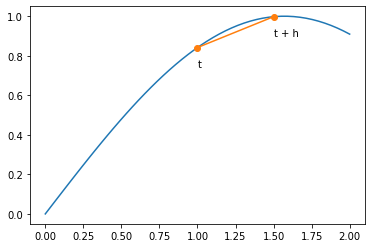

In [5]:
x = np.linspace(0, 2)
tth = np.array([1, 1.5])
plt.plot(x, np.sin(x))  # The f(x) (blue) curve
plt.plot(tth, np.sin(tth), "o-")  # The straight line
plt.text(tth[0], np.sin(tth[0]) - 0.1, "t")
plt.text(tth[1], np.sin(tth[1]) - 0.1, "t + h")
plt.show()

This is a simple formula if you simply take very small $h$, but it has a problem: We are subtracting nearly identical values. This is exactly what we said was bad for numerical precision!

How do we choose an ideal $h$? We'll come back to this soon. Let's cover a slight modification of the last formula first, though.

## Central difference

$$
\frac{dy(t)}{dt} \Biggr\rvert_\mathrm{cd} = \frac{f(t + h/2) - f(t - h/2)}{h} \tag{3}
$$

Just to see how it works, use Taylor expansions
$$
f(x+a) = f(a) + \frac{(x-a)}{1!} \frac{df}{dx}|_{x=a} + \frac{(x-a)^2}{2!} \frac{d^2f}{dx^2}|_{x=a} + \cdots
$$

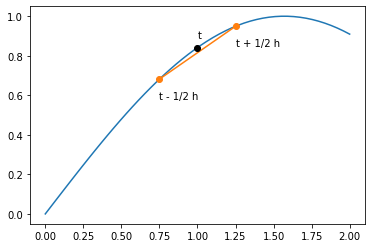

In [6]:
x = np.linspace(0, 2)
tth = np.array([1 - 0.25, 1 + 0.25])
plt.plot(x, np.sin(x))  # The f(x) (blue) curve
plt.plot(tth, np.sin(tth), "o-")  # The straight line
plt.plot(1, np.sin(1), "ko")  # A black ('k') dot
plt.text(1, np.sin(1) + 0.05, "t")
plt.text(tth[0], np.sin(tth[0]) - 0.1, "t - 1/2 h")
plt.text(tth[1], np.sin(tth[1]) - 0.1, "t + 1/2 h")
plt.show()

In [7]:
def c_diff(f, x, h):
    """
    Central difference method.
    f is a function,
    x is the point(s),
    h is the distance to use for the difference.
    """
    return (f(x + h / 2) - f(x - h / 2)) / h

In [8]:
h = 1e-5
print(c_diff(np.sin, 1, h), "- centeral")
print(np.cos(1), "- true")
print(f_diff(np.sin, 1, h), "- forward")

0.54030230586255 - centeral
0.5403023058681398 - true
0.5402980985058647 - forward


## Extrapolated difference

We can combine wider an narrower steps to do even better for a smooth function, though with the downside that we are now evaluating the function at more points.

For that, we start by Taylor expanding around $h/2$ (central difference) as
$$
\frac{dy(t,h/2)}{dt} |_{CD} = \frac{y(t+h/4)-y(t-h/4)}{h/2} \approx y'(t) + \frac{h^2}{96} \frac{d^3y(t)}{dt^3}
$$
Extending this with the so called extended difference algorithms, eliminastes both the quadratic and linear terms

$$
\frac{dy(t)}{dt} \Biggr\rvert_\mathrm{ed} =
\frac{
4 D_\mathrm{cd}(t, h/2) - D_\mathrm{cd}(t, -h/2)
}{3} \approx \frac{dy(t)}{dt} - \frac{h^4 y^{(5)}(t)}{7680}
\tag{4}
$$

In [9]:
def ex_diff(f, x, h):
    """
    Extended difference method.
    f is a function,
    x is the point(s),
    h is the distance to use for the difference.
    """
    return (4 * c_diff(f, x, h / 2) - c_diff(f, x, h)) / 3

In [10]:
h = 1e-5
print(c_diff(np.sin, 1, h), "- centeral")
print(np.cos(1), "- true")
print(ex_diff(np.sin, 1, h), "- extended")

0.54030230586255 - centeral
0.5403023058681398 - true
0.5403023058477471 - extended


## Second derivatives

$$
\frac{d^2 f(t)}{dt^2} \Biggr\rvert_\mathrm{cd} = \frac{f(t + h) + f(t - h) - 2 f(t)}{h^2} \tag{5}
$$

$$
=
\frac{
\left[
f(t + h) - f(t)
\right] - \left[
f(t) - f(t - h)
\right]
}{h^2} \tag{6}
$$

While (5) looks nicer, (6) is computationally better (as long as you are thoughtful about function calls if that matters for you).

* Homework 5: You'll be asked to write a function that calculates the second derivative.

# Searching

Now let's change topics (though you'll see why these are related soon). Let's look at the bound state energy solutions from our book:

$$
\sqrt{V_0 - E_B} \tan{\left( \sqrt{V_0 - E_B} \right)}
=
\sqrt{E_B}
$$

In [2]:
def f1(V, x):
    "The left side of the energy equation"
    return np.sqrt(V - x) * np.tan(np.sqrt(V - x))


def f2(x):
    "The right side of the energy equation"
    return np.sqrt(x)


def sub_f12(V, x):
    "One minus the other should be 0, we'll search for 0s."
    return f1(V, x) - f2(x)

Let's plot both sides of that equation:

In [14]:
x=np.random.rand(10)
z=x>0.5
print(z)
print(x)
y=np.ma.masked_array(x,x<0.5)
w=np.ma.masked_array(x,x>0.5)
print(y)
print(w)

[ True  True False False False False False False False  True]
[0.6754555  0.63159975 0.32837496 0.30476912 0.3950921  0.31709959
 0.42436727 0.45251825 0.14058779 0.96101856]
[0.6754555001444846 0.631599747077694 -- -- -- -- -- -- --
 0.9610185631738853]
[-- -- 0.3283749635752208 0.3047691211388137 0.39509210315920906
 0.3170995893628282 0.4243672655009514 0.4525182458618504
 0.14058778536864347 --]


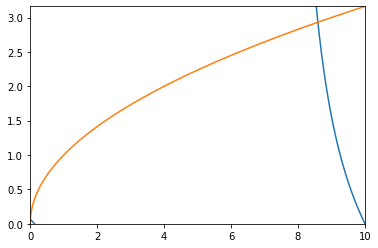

In [3]:
V = 10
x = np.linspace(0, V, 1000)
y1 = f1(V, x)
# give me only those values where y1>0 because we are "masking" values < 0
y1 = np.ma.masked_array(y1, y1 < 0)
plt.plot(x, y1)
plt.plot(x, f2(x))
plt.ylim(0, np.max(f2(x)))
plt.xlim(0, V)
plt.show()

Now, let's plot the left side minus the right side:

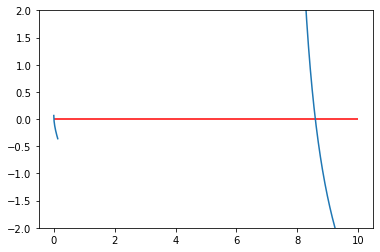

In [6]:
y = sub_f12(V, x)
y = np.ma.masked_array(y, y1 < 0)
plt.plot(x, y)
plt.ylim(-2, 2)
# Plot horizontal lines at each y from xmin to xmax.
plt.hlines(0, 0, V,'red')
plt.show()

### Bisection method:

This is a successive method approximation. We start with a "proposed" solution and we iteratively improve it.
Pick a min and max you know contain a 0. Then divide into two and keep the side with the 0. Repeat.

In [14]:
search = np.array([0, 0.2])  # Must be floating point

for i in range(20):
    vmid = np.mean(search)  # midway between the points
    fmid = sub_f12(V, vmid)  # function eval

    # Check to see if the sign of the first point
    # is the same as our midpoint
    if np.sign(fmid) == np.sign(sub_f12(V, search[0])):
        search[0] = vmid
    else:
        search[1] = vmid
    print(f"{search[0]:11.5} {search[1]:11.5} {fmid:11.5}")

        0.0         0.1    -0.30102
        0.0        0.05    -0.18333
        0.0       0.025    -0.10527
        0.0      0.0125   -0.052674
        0.0     0.00625   -0.016782
   0.003125     0.00625   0.0079461
   0.003125   0.0046875   -0.005404
  0.0039062   0.0046875  0.00095454
  0.0039062   0.0042969  -0.0022926
  0.0039062   0.0041016 -0.00068722
  0.0040039   0.0041016  0.00012896
  0.0040039   0.0040527 -0.00028029
  0.0040039   0.0040283 -7.5956e-05
  0.0040161   0.0040283  2.6427e-05
  0.0040161   0.0040222 -2.4783e-05
  0.0040192   0.0040222  8.1732e-07
  0.0040192   0.0040207 -1.1984e-05
  0.0040192   0.0040199 -5.5836e-06
  0.0040192   0.0040195 -2.3832e-06
  0.0040192   0.0040194 -7.8296e-07


#### Try it now:

* Find the other root
* Look for some with $V_0$ of 20, 30, 40.

#### Try it later:

* Try turning this into a proper function.
* Have the algorithm decide when to stop. You can have several criteria.

### Newton-Raphson searching

We can do much better for most functions by "guessing" where the function would cross the axes with straight line tangent to the curve. We update our guess with the intersection of this straight line with the axes.

$$
\Delta x = -\frac{f(x_0)}{df/dx\bigr|_{x_0}}
$$

#### Aside: setting function parameters

We made a "mistake" with our function definition. We have a function $f(V,x)$, but our functions that take derivatives all expect $f(x)$! It turns out we can use `functools.partial` to make a new function with some of the function parameters already set. (This is called "currying" in some languages).

In [15]:
from functools import partial

# Before: sub_f12(V,x)
sub_f12_V = partial(sub_f12, V)
# After: sub_f12_V(x)

Okay, ready to find the same 0 as before:

In [16]:
guess = 0

for i in range(10):
    dfdx = f_diff(sub_f12_V, guess, 0.00001)
    fval = sub_f12_V(guess)  # Function at old guess
    guess -= fval / dfdx  # Update guess
    fval = sub_f12_V(guess)  # Function at new guess
    print(f"{guess:11.5} {fval:11.5}")

 0.00020655    0.050945
   0.001667    0.023752
  0.0035327   0.0042059
  0.0040048  0.00012167
  0.0040193  3.1949e-08
  0.0040193 -1.8661e-11
  0.0040193  1.1546e-14
  0.0040193 -7.2164e-16
  0.0040193 -4.1633e-17
  0.0040193         0.0
